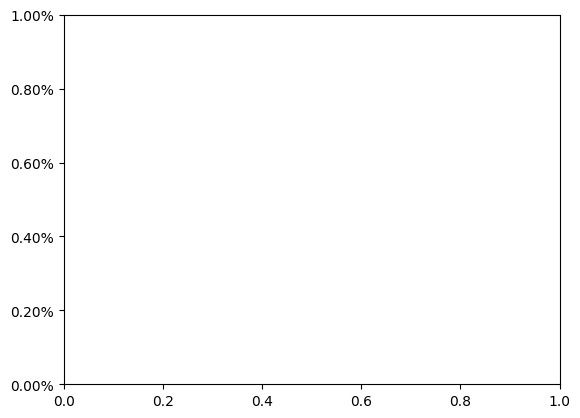

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Código adicional

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

In [5]:
df_compras = pd.read_csv('C:/Users/sao/Desktop/Python/Datascience/datasets/Datos compras.csv')
df_compras.head()

,Transaccion,Producto
0,1,Leche
1,1,Huevos
2,1,Pan
3,1,Mantequilla
4,2,Salchichas


Se hace un conteo por producto(Frecuencias absolutas)

In [6]:
frec = pd.value_counts(df_compras['Producto'])
frec

Producto
Leche          9
Pan            9
Mantequilla    9
Galletas       5
Catsup         3
Huevos         2
Salchichas     2
Harina         1
Mermerlada     1
Atun           1
Name: count, dtype: int64

Se guarda la info en un dataframe


In [8]:
frec_df=pd.DataFrame(frec)
#Asignamos el nombre Frec_abs a la columna
frec_df.columns = ["Frec_abs"]
frec_df

,Frec_abs
Producto,
Leche,9
Pan,9
Mantequilla,9
Galletas,5
Catsup,3
Huevos,2
Salchichas,2
Harina,1
Mermerlada,1


In [11]:
#calculamos la frecuencia relativa en porcentaje
frec_df["Frec_real_%"]=100*frec_df["Frec_abs"]/len(df_compras)
frec_df

,Frec_abs,Frec_real_%
Producto,,
Leche,9,21.428571
Pan,9,21.428571
Mantequilla,9,21.428571
Galletas,5,11.904762
Catsup,3,7.142857
Huevos,2,4.761905
Salchichas,2,4.761905
Harina,1,2.380952
Mermerlada,1,2.380952


In [13]:
# se calcula la Frecuencia Relativa en porcentaje Acumulada
#Obtenemos los valors de las Frecuencias Absolutas
Frec_rel_val = frec_df["Frec_real_%"].values

#Creamos una lista vacia en donde registraremos las frecuencias absolutas acumuladas
acum = []

#Iniciamos una variable en la que se guarda los valores anteriores
valor_acum = 0

#Se recorrera la lista de las frecuencias absolutas para que vaya sumando

for i in Frec_rel_val:
    valor_acum=valor_acum+ i
    acum.append(valor_acum)

frec_df["Frec_real_%_acum"] = acum
frec_df


,Frec_abs,Frec_real_%,Frec_real_%_acum
Producto,,,
Leche,9,21.428571,21.428571
Pan,9,21.428571,42.857143
Mantequilla,9,21.428571,64.285714
Galletas,5,11.904762,76.190476
Catsup,3,7.142857,83.333333
Huevos,2,4.761905,88.095238
Salchichas,2,4.761905,92.857143
Harina,1,2.380952,95.238095
Mermerlada,1,2.380952,97.619048


NameError: name 'PercentFormatter' is not defined

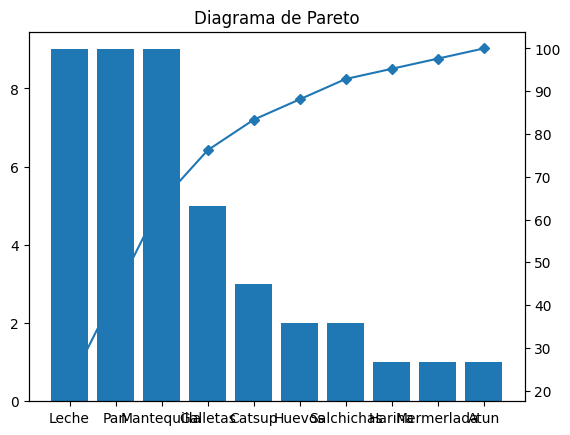

In [28]:
# Indicamos que utillizaremos un solo gráfico
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
#Le asionamos un titulo al gráfico
ax.set_title('Diagrama de Pareto')

#Creamos una gráfica de barras con las frecuencias absolutas
ax.bar(frec_df. index, frec_df["Frec_abs"], color="C0")

#Graficamos los valores de la Frecuencia Relativa Acumulada
ax2 = ax.twinx() #Le indicamos que este será el nuevo eje a graficar
ax2.plot(frec_df. index, frec_df["Frec_real_%_acum"], color="C0", marker="D", ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())
#Asignamos un color para las etiquetas de los ejes "y"
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C0")
#Rotamos las etiquetas del eje de las x's
ax.set_xticklabels(frec_df. index, rotation=75)
plt.show()

Version corregida

C:\Users\sao\AppData\Local\Temp\ipykernel_11688\2584987966.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(frec_df.index, rotation=75)


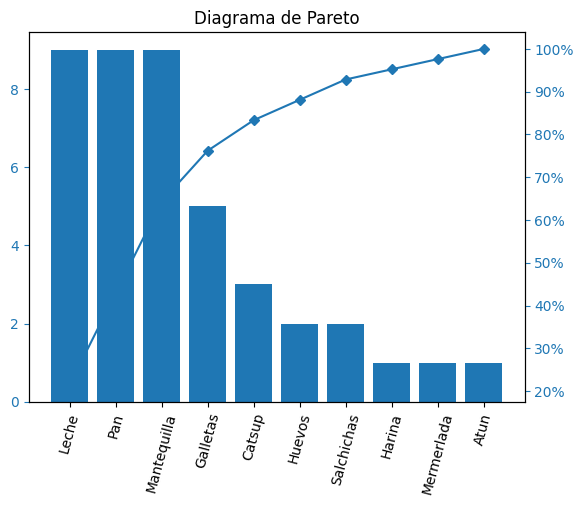

In [29]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Indicamos que utilizaremos un solo gráfico
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Le asignamos un título al gráfico
ax.set_title('Diagrama de Pareto')

# Creamos una gráfica de barras con las frecuencias absolutas
ax.bar(frec_df.index, frec_df["Frec_abs"], color="C0")

# Graficamos los valores de la Frecuencia Relativa Acumulada
ax2 = ax.twinx()  # Le indicamos que este será el nuevo eje a graficar
ax2.plot(frec_df.index, frec_df["Frec_real_%_acum"], color="C0", marker="D", ms=5)

# Función para formatear el eje y con porcentajes
def format_percent(x, pos):
    return f"{x:.0f}%"

# Aplicamos la función de formateo al eje y
ax2.yaxis.set_major_formatter(mtick.FuncFormatter(format_percent))

# Asignamos un color para las etiquetas de los ejes "y"
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C0")

# Rotamos las etiquetas del eje x
ax.set_xticklabels(frec_df.index, rotation=75)

plt.show()
